In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data

In [3]:
df = pd.read_csv('../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("That's all 94 characters.")
print(df['labels'].unique())

That's all 94 characters.
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']


# Now let's take a look of the dataset.

X - Input to the neural network.
Y - Output


In [6]:
y=df['labels']
X=df.drop(['names','labels'],axis=1)

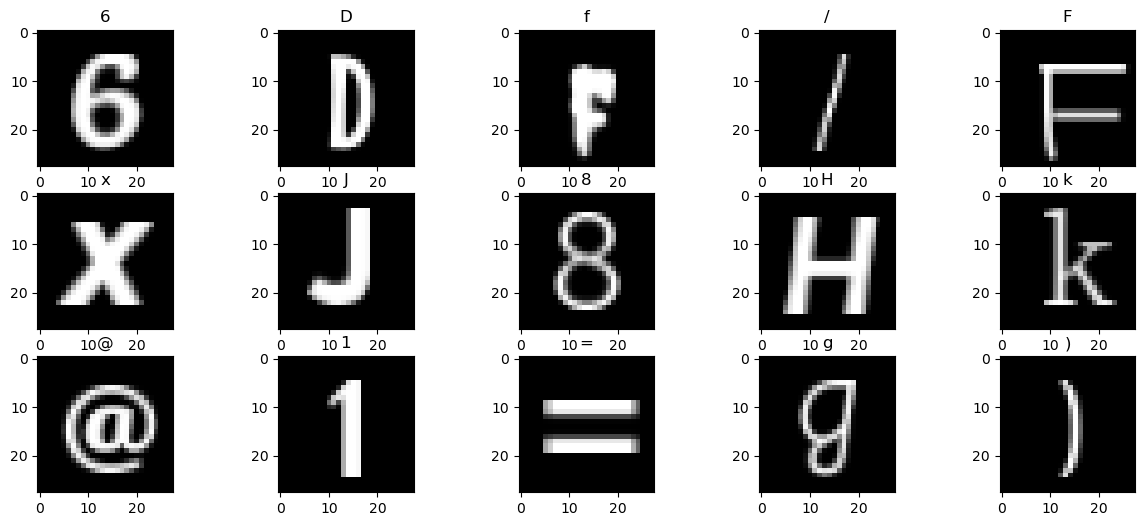

In [7]:
#defining the class column and removing other unneccesary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(15, 6))
for i in range(15):  
  plt.subplot(3,5,i+1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

# Create training and test sets.
Split the data set into two parts, 80% is the training set and 20% is the test set.

In [15]:
from sklearn.model_selection import train_test_split
# creating training set using 80% of data and test set using 20% of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [16]:
X_train.shape, X_test.shape


((219274, 784), (54819, 784))

In [17]:
y_train.shape, y_test.shape


((219274,), (54819,))

# Pre-processing input for neural network
Pre-processing input for a neural network involves transforming the raw input data into a format that can be easily understood by the network

In [18]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(219274,)
Test labels dimension:
(54819,)


# Normalizing the Dataset for the Neural Network
Normalization is an important pre-processing step for preparing a dataset for a neural network. The goal of normalization is to rescale the input data to a common range that allows the neural network to learn more effectively


In [20]:
X_train, X_test = X_train/255, X_test/255


# Building Neural Network
Building a neural network involves designing the architecture of the network, choosing appropriate activation functions and loss functions, and training the network using an optimization algorithm such as stochastic gradient descent (SGD)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score, accuracy_score

In [23]:
model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(y_train_label.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 125)               31375     
                                                                 
 dense_3 (Dense)             (None, 94)                11844     
                                                                 
Total params: 560,969
Trainable params: 560,969
Non-trainable params: 0
_________________________________________________________________


Configure the model and start training


In [25]:
model.fit(X_train, y_train_label, epochs=100, batch_size=250, verbose=1, validation_split=0.15)


Epoch 1/100
746/746 [==============================] - 14s 17ms/step - loss: 2.7094 - accuracy: 0.3021 - val_loss: 1.6604 - val_accuracy: 0.5607
Epoch 2/100
746/746 [==============================] - 12s 16ms/step - loss: 1.3722 - accuracy: 0.6414 - val_loss: 1.1345 - val_accuracy: 0.7070
Epoch 3/100
746/746 [==============================] - 12s 16ms/step - loss: 1.0109 - accuracy: 0.7353 - val_loss: 0.9209 - val_accuracy: 0.7569
Epoch 4/100
746/746 [==============================] - 12s 16ms/step - loss: 0.8520 - accuracy: 0.7725 - val_loss: 0.8097 - val_accuracy: 0.7801
Epoch 5/100
746/746 [==============================] - 12s 16ms/step - loss: 0.7663 - accuracy: 0.7913 - val_loss: 0.7435 - val_accuracy: 0.7998
Epoch 6/100
746/746 [==============================] - 12s 16ms/step - loss: 0.6996 - accuracy: 0.8062 - val_loss: 0.6752 - val_accuracy: 0.8121
Epoch 7/100
746/746 [==============================] - 12s 16ms/step - loss: 0.6402 - accuracy: 0.8200 - val_loss: 0.6375 - val_ac

# Test the model after training
Testing a neural network model involves evaluating the performance of the model on a separate dataset from the one used for training. The test data should be representative of the real-world data that the model will encounter. The test data is passed through the trained neural network model to obtain predictions.

In [26]:
test_results = model.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

1714/1714 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.9141
Test results - Accuracy: 0.9140626192092896%


# Test the model after training using Sklearn accuracy score¶
The accuracy score represents the percentage of correctly classified instances in the test data.

In [27]:
prediction = model.predict(X_test)
prediction = lb.inverse_transform(prediction)
print(f'Test results - Accuracy: {accuracy_score(y_test, prediction)*100}%')


1714/1714 [==============================] - 5s 3ms/step
Test results - Accuracy: 91.40626425144566%
